**FINANCIAL DATA ANALYSIS**

Pandas
Numpy
Matplotlib
Beautifulsoup
Scikit-learn /sklearn 

In [1]:
pip install pandas_datareader

In [2]:
pip install mplfinance

### GET THE DATA FROM WEB AND CONVERT TO CSV AND DISPLAY

In [38]:
import datetime as dt # to set start and end times for data we use
import matplotlib.pyplot as plt
from matplotlib import style 
#from matplotlib.finance import candlestick_ohl
import mplfinance as mpf
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mdates 
import pandas as pd
import pandas_datareader.data as web

style.use('ggplot')
"""
start=dt.datetime(2000,1,1)
end=dt.datetime(2020,12,31)
"""
#to create our dataframe use the company's tinker, source, starttime, endtime
"""
df=web.DataReader('TSLA','yahoo', start, end)
print(df.head())
"""
# to convert csv
"""
df.to_csv('tsla.csv')
"""
#after conversion mute the above, read csv and set date as index (this is because on conversion date is no longer index)
df=pd.read_csv('tsla.csv', parse_dates=True, index_col=0)

In [39]:
df.head

<bound method NDFrame.head of                   High         Low       Open       Close      Volume  \
Date                                                                    
2010-06-29    5.000000    3.508000    3.80000    4.778000  93831500.0   
2010-06-30    6.084000    4.660000    5.15800    4.766000  85935500.0   
2010-07-01    5.184000    4.054000    5.00000    4.392000  41094000.0   
2010-07-02    4.620000    3.742000    4.60000    3.840000  25699000.0   
2010-07-06    4.000000    3.166000    4.00000    3.222000  34334500.0   
...                ...         ...        ...         ...         ...   
2020-12-24  666.090027  641.000000  642.98999  661.770020  22865600.0   
2020-12-28  681.400024  660.799988  674.51001  663.690002  32278600.0   
2020-12-29  669.900024  655.000000  661.00000  665.989990  22910800.0   
2020-12-30  696.599976  668.359985  672.00000  694.780029  42846000.0   
2020-12-31  718.719971  691.119995  699.98999  705.669983  49649900.0   

             Adj Clo

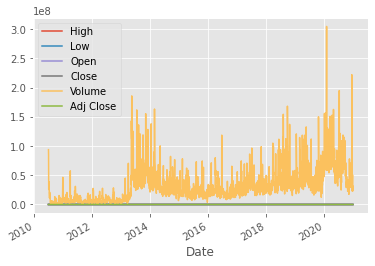

In [40]:
df.plot()
plt.show()

AxesSubplot(0.125,0.2;0.775x0.68)


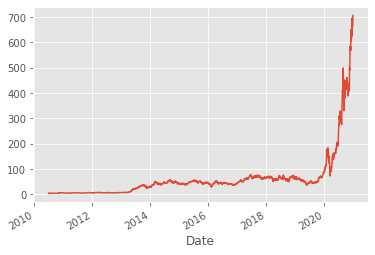

In [41]:
print((df['Adj Close']).plot())

### BASIC MANIPULATION

In [42]:
# to create new columns > '100 moving average' - the average of the last 99 days done everyday 
df['100ma'] = df['Adj Close'].rolling(window=100, min_periods=0).mean()
df.tail

<bound method NDFrame.tail of                   High         Low       Open       Close      Volume  \
Date                                                                    
2010-06-29    5.000000    3.508000    3.80000    4.778000  93831500.0   
2010-06-30    6.084000    4.660000    5.15800    4.766000  85935500.0   
2010-07-01    5.184000    4.054000    5.00000    4.392000  41094000.0   
2010-07-02    4.620000    3.742000    4.60000    3.840000  25699000.0   
2010-07-06    4.000000    3.166000    4.00000    3.222000  34334500.0   
...                ...         ...        ...         ...         ...   
2020-12-24  666.090027  641.000000  642.98999  661.770020  22865600.0   
2020-12-28  681.400024  660.799988  674.51001  663.690002  32278600.0   
2020-12-29  669.900024  655.000000  661.00000  665.989990  22910800.0   
2020-12-30  696.599976  668.359985  672.00000  694.780029  42846000.0   
2020-12-31  718.719971  691.119995  699.98999  705.669983  49649900.0   

             Adj Clo

In [43]:
#to drop the first days that can have 100ma
df.dropna(inplace=True)
df.head

<bound method NDFrame.head of                   High         Low       Open       Close      Volume  \
Date                                                                    
2010-06-29    5.000000    3.508000    3.80000    4.778000  93831500.0   
2010-06-30    6.084000    4.660000    5.15800    4.766000  85935500.0   
2010-07-01    5.184000    4.054000    5.00000    4.392000  41094000.0   
2010-07-02    4.620000    3.742000    4.60000    3.840000  25699000.0   
2010-07-06    4.000000    3.166000    4.00000    3.222000  34334500.0   
...                ...         ...        ...         ...         ...   
2020-12-24  666.090027  641.000000  642.98999  661.770020  22865600.0   
2020-12-28  681.400024  660.799988  674.51001  663.690002  32278600.0   
2020-12-29  669.900024  655.000000  661.00000  665.989990  22910800.0   
2020-12-30  696.599976  668.359985  672.00000  694.780029  42846000.0   
2020-12-31  718.719971  691.119995  699.98999  705.669983  49649900.0   

             Adj Clo

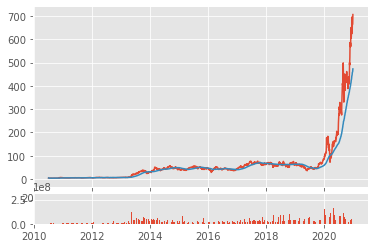

In [45]:
# axis - grid size, startingpoint, rowspan, colspan
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)

ax1.plot(df.index, df['Adj Close'])
ax1.plot(df.index, df['100ma'])
ax2.bar(df.index, df['Volume'])


plt.show()

In [46]:
#RESAMPLE DATA
# 1.create a new dataframe
#to 10day(10D) - 10 min(10min) -- this is not a moving average. It is just mean for 10days
#volume for 10 days. use sum in place of mean as it shows actual volume
df_ohlc= df['Adj Close'].resample('10D').ohlc()
df_volume= df['Volume'].resample('10D').sum()

df_ohlc.head()


,open,high,low,close
Date,,,,
2010-06-29,4.778,4.778,3.160,3.492
2010-07-09,3.480,4.128,3.410,4.128
2010-07-19,4.382,4.382,4.044,4.144
2010-07-29,4.070,4.390,3.918,3.918
2010-08-08,3.920,3.920,3.520,3.830


In [47]:
#reset the index for df_ohlc to set date as column
df_ohlc.reset_index(inplace=True)
df_ohlc["Date"] = df_ohlc["Date"].map(mdates.date2num)
df_ohlc.head()
#df_ohlc['Date'] = df_ohlc['Date'].map(matplotlibdates.date2num)

,Date,open,high,low,close
0,14789.0,4.778,4.778,3.160,3.492
1,14799.0,3.480,4.128,3.410,4.128
2,14809.0,4.382,4.382,4.044,4.144
3,14819.0,4.070,4.390,3.918,3.918
4,14829.0,3.920,3.920,3.520,3.830


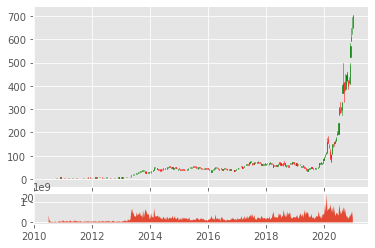

In [48]:
# axis - grid size, startingpoint, rowspan, colspan
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)

ax1.xaxis_date()
candlestick_ohlc(ax1, df_ohlc.values, width=2, colorup='g')
ax2.fill_between(df_volume.index.map(mdates.date2num), df_volume.values, 0)

plt.show()